# Most Profitable Studios Analysis

## Recommendation

   I'm going to recommend that Microsoft mirror the competition in this industry. The Walt Disney Company purchased 21st Century Fox for 71.3 billion, Amazon just recently purchased MGM studios for 8.4 billion, and Warner Media merged with Discovery.  Sony Pictures would be an awesome buy for a tech giant like Microsoft, and I'll show why in this analysis. 


## Step 1: 
Importing necessary tools

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Step 1.1: 
Reading in the data

In [2]:
df = pd.read_csv('tmdb.movies.csv', index_col=0)
df1 = pd.read_csv('bom.movie_gross.csv')

In [3]:
df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [4]:
df1.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


## Step 2: Data Cleaning
Examining the dataframes above, we can see that they all have a column named title. Let's merge the information on the
title column. 

In [5]:
df_merge = pd.merge(df, df1, on='title')

#Create new dataframe the columns we want 
new_df = df_merge[['title', 'year', 'studio', 'popularity', 'domestic_gross', 'foreign_gross']].sort_values(by='year', ascending=False)
new_df.head()

,title,year,studio,popularity,domestic_gross,foreign_gross
2702,Last Letter,2018,CL,0.600,181000.0,NaN
2555,Mortal Engines,2018,Uni.,40.095,16000000.0,67700000
2566,Ready Player One,2018,WB,30.029,137700000.0,445200000
2565,Mary Poppins Returns,2018,BV,30.419,172000000.0,177600000
2564,The Meg,2018,WB,31.397,145400000.0,384800000


### Step 2.1: Data Cleaning Cont.
Add foreign and domestic profits together to get an international picture of how much each movie has made. 

In [6]:
# Convert the domestic gross column to a numeric column so it can be added to the foreign gross column and fill all
# NaN values. 
new_df['domestic_gross'] = pd.to_numeric(new_df['domestic_gross'])
new_df['domestic_gross'] = new_df['domestic_gross'].fillna(0)

# remove commas from foreign gross, convert to a numeric column, and remove all NaN values. 
new_df['foreign_gross'].replace(',','', regex=True, inplace=True)
new_df['foreign_gross'] = pd.to_numeric(new_df['foreign_gross'])
new_df['foreign_gross'] = new_df['foreign_gross'].fillna(0)

# Create a new column adding the domestic and foreign gross values together to show each title's total gross 
new_df['total_gross'] = new_df['domestic_gross'] + new_df['foreign_gross']

# Limit results to only the past 10 years (2011)
new_df = new_df.loc[new_df['year'] >= 2011] 

# Order our new dataframe by total_gross to view the top grossing films of the last ten years. 
new_df = new_df.sort_values(by='total_gross', ascending=False)
new_df

,title,year,studio,popularity,domestic_gross,foreign_gross,total_gross
1622,Avengers: Age of Ultron,2015,BV,44.383,459000000.0,946400000.0,1.405400e+09
608,Black Panther,2018,BV,2.058,700100000.0,646900000.0,1.347000e+09
609,Black Panther,2018,BV,44.140,700100000.0,646900000.0,1.347000e+09
2320,Star Wars: The Last Jedi,2017,BV,34.293,620200000.0,712400000.0,1.332600e+09
2319,Star Wars: The Last Jedi,2017,BV,34.293,620200000.0,712400000.0,1.332600e+09
...,...,...,...,...,...,...,...
1132,Into the White,2013,Magn.,7.072,700.0,0.0,7.000000e+02
555,Death of a Superhero,2012,Trib.,5.158,600.0,0.0,6.000000e+02
2423,2:22,2017,Magn.,11.316,400.0,0.0,4.000000e+02
2251,Satanic,2016,Magn.,6.403,300.0,0.0,3.000000e+02


### Note*
Something to keep in mind is that Disney acquired 21st Century Fox in 2019. The data here from Fox shows movies that were made before 2019, so they are still considered to be made by Fox during the time this data was gathered. 


## Step 3: Data Exploration and Questions
In this step I'll explore the data set and answer these questions: 

1. Which studios grossed the most money in the past 10 years?
2. Which studios made the most movies in the last 10 years?
3. Which studios made the most popular films?

### Step 3.1: 
Which studios grossed the most money in the past 10 years?
    

In [7]:
# Create a new data frame with the total_gross as the values and the columns as the studios/ 
studio_totals = new_df.pivot_table(index=new_df.index, values='total_gross', columns='studio')

# Let's make a dictionary of all these studios and their total gross, then sort them from greatest to least. 
# Dictionary of the dataframe from studio_totals
x = dict(studio_totals.sum(0))

# Find the average of all of the studios total profits 
list_studio_values = list(studio_totals.sum(0))
list_studio_index = list(studio_totals.sum(0).index)
avg_list_studio_values = sum(list_studio_values) / len(list_studio_values)

#I want my plot to show studios that had at or above the average total_gross of all films.  
x1 = dict((k, v) for k, v in x.items() if v >= avg_list_studio_values) 

#Now I want to sort my values from greatest to least
x2 = {k: v for k, v in sorted(x1.items(), key=lambda item: item[1], reverse=True)}
x2

{'BV': 46440514631.7,
 'Fox': 30095166596.0,
 'Uni.': 27890183191.4,
 'WB': 24012620999.0,
 'Sony': 18114886498.0,
 'Par.': 16730279696.0,
 'WB (NL)': 10508699999.0,
 'LGF': 8426402400.0,
 'LG/S': 4496523999.0,
 'P/DW': 3420300000.0,
 'Wein.': 3359832697.0,
 'Focus': 2513440000.0,
 'FoxS': 2404889300.0,
 'SGem': 1993187000.0,
 'WGUSA': 1828468400.0,
 'STX': 1733600000.0,
 'TriS': 1711315000.0,
 'Rela.': 1679894000.0,
 'ORF': 1421526999.0}

### Step 3.2: Visualization 

Text(0, 0.5, 'Gross in Billions')

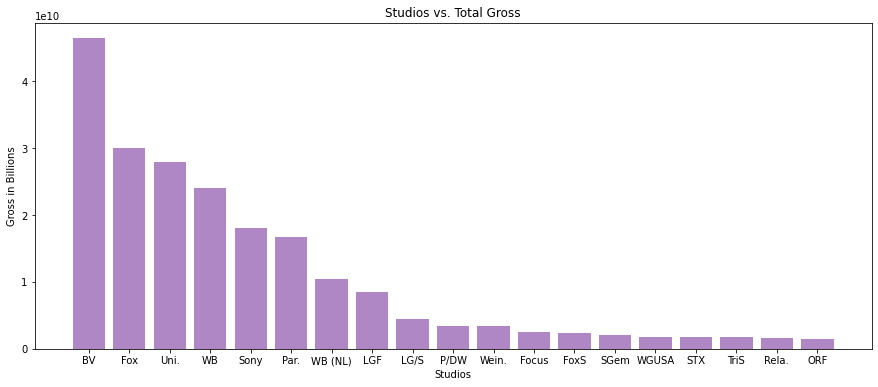

In [8]:
#I'll get my x axis from the keys in the dictionary and my height from the values in the dictionary above. 
x = list(x2.keys())
height = list(x2.values())

fig, ax = plt.subplots(figsize=(15,6))

ax.bar(x, height, color='#af87c4')

ax.set_title('Studios vs. Total Gross')
ax.set_xlabel('Studios')
ax.set_ylabel('Gross in Billions')

### Note* 
Disney is represented as BV. Disney appears to gross the most money based on this data. 

### Step 3.3:
Which studios made the most movies in the last 10 years?

Text(0, 0.5, 'Number of Movies')

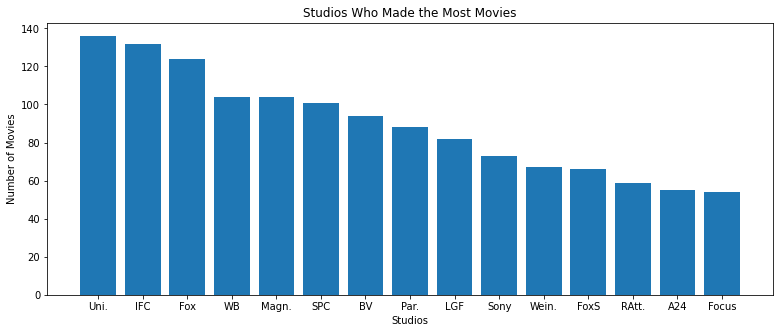

In [9]:
# Show the value counts for each studio that gives us the number of movies each studio made. 
studio_counts = new_df['studio'].value_counts()
x = list(studio_counts.index)
y = list(studio_counts.values)

#Let's only show studios that made 50 or more movies. 
height = []
for i in y: 
    if i >= 50: 
        height.append(i)

fig, ax = plt.subplots(figsize=(13,5))

ax.bar(x[0:15], height)

ax.set_title('Studios Who Made the Most Movies')
ax.set_xlabel('Studios')
ax.set_ylabel('Number of Movies')

### Note*
It appears that just because the studio makes a lot of movies, doesn't mean they gross the most money. Even though Disney made the most money, they didn't make the highest quantity of movies.

### Step 3.4: 
Which studios made the most popular films?

In [10]:
# Sort our dataframe to see the most popular movies
popularity_df = new_df.sort_values(by='popularity', ascending=False)

# Create a dataframe that shows the top 50 most popular movies in the last 10 years 
popularity_df = popularity_df[['studio', 'title', 'popularity']]
top_pop = popularity_df.pivot_table(index=new_df.index, values='popularity', columns='studio').head(50)

# Create a dictionary showing the popularity for each studio
dict_top_pop = dict(top_pop.sum(0))

# Now limit those results to see studios that had higher popularity than 8. 
dict_top_pop = dict((k, v) for k, v in dict_top_pop.items() if v > 8) 

# Sort them from greatest to least 
dict_top_pop = {k: v for k, v in sorted(dict_top_pop.items(), key=lambda item: item[1], reverse=True)}
dict_top_pop

{'WB': 74.477,
 'IFC': 56.138000000000005,
 'BV': 55.827999999999996,
 'Fox': 51.71600000000001,
 'LGF': 25.131,
 'Wein.': 15.641,
 'BG': 15.521999999999998,
 'SPC': 10.952,
 'BST': 9.486,
 'STX': 8.574,
 'Anch.': 8.322000000000001,
 'WGUSA': 8.16}

### Step 3.5: Visualization 

Text(0, 0.5, 'Popularity')

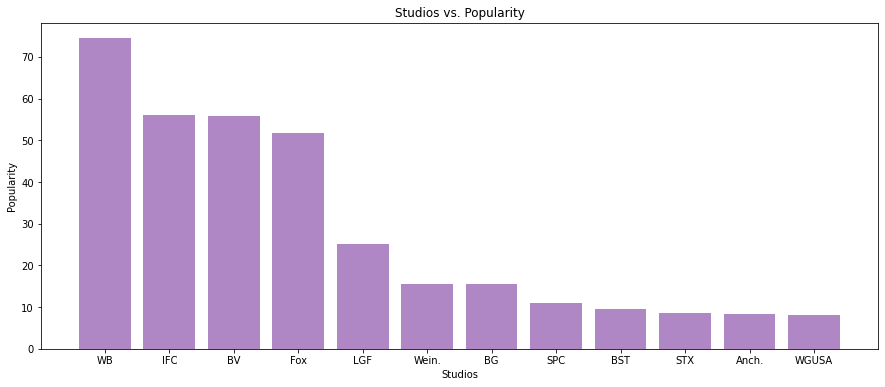

In [11]:
x = list(dict_top_pop.keys())
height = list(dict_top_pop.values())

fig, ax = plt.subplots(figsize=(15,6))

ax.bar(x, height, color='#af87c4')

ax.set_title('Studios vs. Popularity')
ax.set_xlabel('Studios')
ax.set_ylabel('Popularity')

## Step 4: Merging New Data
I'll bring in new data that contains the production budgets so I can calculate net profits by subtracting the production budget from the total gross. 

In [12]:
#Read in our new data set
df2 = pd.read_csv('tn.movie_budgets.csv')
df2 = df2[['movie', 'production_budget']]

#Clean up this data 
#remove the commas from the data so we can convert this column to a numeric column to calculate our net profit.
df2['production_budget'].replace(',','', regex=True, inplace=True)
#remove the dollar signs.
df2['production_budget'].replace({'\$':''}, regex = True, inplace=True)

#rename 'movie' to 'title' for an easier merge since the other data shows 'title' for the movie names
df2 = df2.rename(columns={"movie": "title"})
df2

,title,production_budget
0,Avatar,425000000
1,Pirates of the Caribbean: On Stranger Tides,410600000
2,Dark Phoenix,350000000
3,Avengers: Age of Ultron,330600000
4,Star Wars Ep. VIII: The Last Jedi,317000000
...,...,...
5777,Red 11,7000
5778,Following,6000
5779,Return to the Land of Wonders,5000
5780,A Plague So Pleasant,1400


### Step 4.1 Merge the new data

In [13]:
# Merge the new data set on the shared 'title' column. 
df_merge = pd.merge(new_df, df2, on='title') 
df_merge = df_merge[['title', 'studio', 'year', 'total_gross', 'production_budget']]
df_merge['production_budget'] = pd.to_numeric(df_merge['production_budget'])
df_merge['net_profit'] = df_merge['total_gross'] - df_merge['production_budget']
net_profit_df = df_merge

#Sort them to see the studios with the highest net profit. 
net_profit_df.sort_values(by='net_profit', ascending=False, inplace=True)
net_profit_df

,title,studio,year,total_gross,production_budget,net_profit
1,Black Panther,BV,2018,1.347000e+09,200000000,1.147000e+09
2,Black Panther,BV,2018,1.347000e+09,200000000,1.147000e+09
3,Jurassic World: Fallen Kingdom,Uni.,2018,1.309500e+09,170000000,1.139500e+09
4,Frozen,BV,2013,1.276400e+09,150000000,1.126400e+09
5,Frozen,BV,2013,1.276400e+09,150000000,1.126400e+09
...,...,...,...,...,...,...
565,R.I.P.D.,Uni.,2013,7.830000e+07,130000000,-5.170000e+07
624,Monster Trucks,Par.,2017,6.450000e+07,125000000,-6.050000e+07
1208,Evolution,IFC,2016,2.480000e+04,80000000,-7.997520e+07
1209,Evolution,IFC,2016,2.480000e+04,80000000,-7.997520e+07


### Step: 4.2 
What studios had the highest net profit?


In [14]:
#Created a new table showing the columns as studios and values as their net profits. 
studio_profits = net_profit_df.pivot_table(index=df_merge.index, values='net_profit', columns='studio')

#Find the average net profit for all the studios. I want to calculate the average to see the studios that made at or
#above this amount. 
list_studio_profits = list(studio_profits.sum(0))
list_studio_index = list(studio_profits.sum(0).index)
avg_list_studio_profits = sum(list_studio_profits) / len(list_studio_profits)
avg_list_studio_profits

#Make a dictionary of the studio_profits dataframe to get the keys as the studio name and their values as net profit.
a = dict(studio_profits.sum(0))
net_profit_keys = list(a.keys())
net_profit_values = list(a.values())

#I want to show the studios that had at or above average net profit.  
b = dict((k, v) for k, v in a.items() if v >= avg_list_studio_profits) 

#Now I want to sort my values from greatest to least and show studios with the highest net profits. 
c = {k: v for k, v in sorted(b.items(), key=lambda item: item[1], reverse=True)}
c

{'BV': 28799801369.5,
 'Fox': 20495033596.0,
 'Uni.': 19510861191.4,
 'WB': 14879520998.0,
 'Sony': 12798499998.0,
 'Par.': 8942766996.0,
 'WB (NL)': 7066199999.0,
 'LGF': 5392518000.0,
 'P/DW': 2615300000.0,
 'LG/S': 2492493999.0,
 'Wein.': 2077783397.0}

### 4.3 Visualization 

Text(0, 0.5, 'Net Profits in Billions')

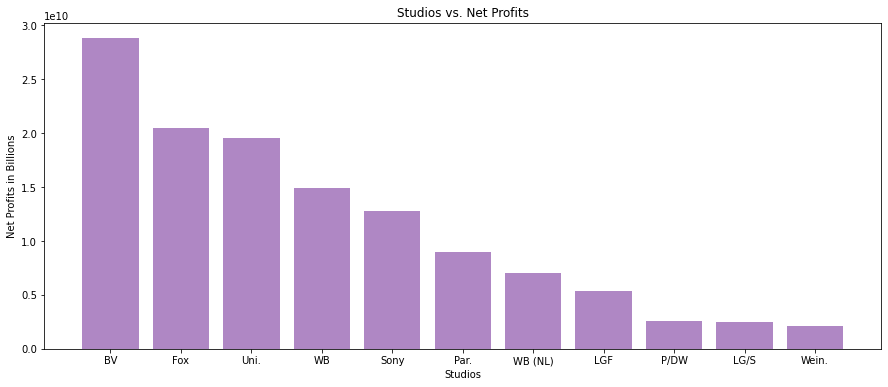

In [15]:
c_keys = list(c.keys())
c_values = list(c.values())

fig, ax = plt.subplots(figsize=(15,6))

ax.bar(x=c_keys, height=c_values, color='#af87c4')

ax.set_title('Studios vs. Net Profits')
ax.set_xlabel('Studios')
ax.set_ylabel('Net Profits in Billions')

The visualizations for net profit show Disney still has the highest profits. 

## Step 5: Exploring the Stats

I'll examine the net profits that each studio made on average for each movie. 

Text(0, 0.5, 'Profits in Billions')

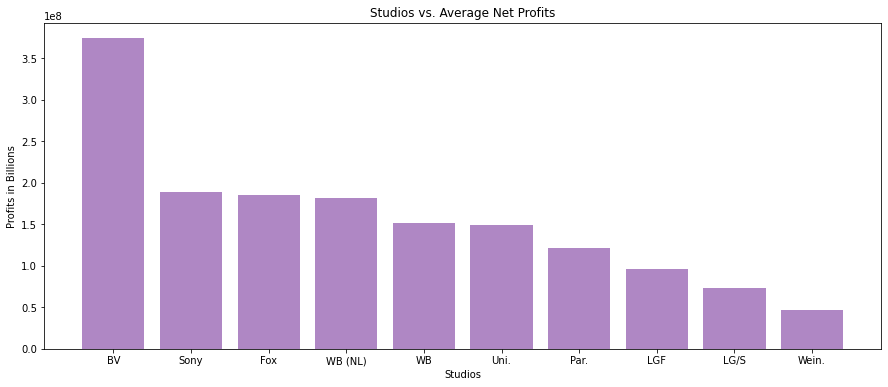

In [16]:
# Create a dataframe of the stats for studios that had the highest net profits. 
studio_profit_stats = studio_profits.describe()
stats = studio_profit_stats[['BV', 'Fox', 'Uni.', 'WB', 'Sony', 'Par.', 'WB (NL)', 'LGF', 'LG/S', 'Wein.']]
# Show the average net profits for each studio in our stats dataframe 
mean_np_studios = stats[1:4:5]

# Create a dictionary where the keys are the studios and the means are the values. 
d = dict(mean_np_studios.sum(0))

# Sort them from greatest to least
d = {k: v for k, v in sorted(d.items(), key=lambda item: item[1], reverse=True)}
d

#Let's show the average net profits of each studio over the last ten years for their films. 
x = list(d.keys())
height = list(d.values())

fig, ax = plt.subplots(figsize=(15,6))

ax.bar(x, height, color='#af87c4')

ax.set_title('Studios vs. Average Net Profits')
ax.set_xlabel('Studios')
ax.set_ylabel('Profits in Billions')

## Step 6: Recommendations

It appears Sony Pictures has the second highest net profits on average of the films they've made. Sony Pictures would be an awesome buy for Microsoft. 